In [38]:
import pandas as pd
import seaborn as sns

In [5]:
imp = pd.read_csv('../Artefacts/exp_21/importance.csv')

In [11]:
avgimp = imp.groupby('Feature', as_index=False).agg({'Importance' : 'sum'})

In [14]:
avgimp.sort_values(by='Importance', ascending=False).head(10)

,Feature,Importance
30,item_cnt_day_lag1,2.169403
34,item_cnt_day_lag2,0.428223
2,item_category_id,0.340512
35,item_cnt_day_lag3,0.255254
39,item_cnt_day_lag7,0.194444
36,item_cnt_day_lag4,0.168454
15,item_category_name_en_games,0.151072
40,item_cnt_day_lag8,0.149591
43,shop_id,0.145878
37,item_cnt_day_lag5,0.139443


In [15]:
avgimp.sort_values(by='Importance', ascending=False).tail(10)

,Feature,Importance
57,shop_name_en_trc,0.000000
52,shop_name_en_sc,-0.000010
47,shop_name_en_ii,-0.000025
4,item_category_name_en_360,-0.000061
48,shop_name_en_mall,-0.000079
54,shop_name_en_shopping,-0.000114
12,item_category_name_en_edition,-0.000143
49,shop_name_en_mega,-0.000219
55,shop_name_en_tc,-0.000225
24,item_category_name_en_ps3,-0.000269


### Bi Grams

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

In [17]:
dfitemcats = pd.read_csv('../data/item_categories_en.csv')

In [18]:
dfitemcats

,item_category_name,item_category_id,item_category_name_en
0,PC - Гарнитуры/Наушники,0,PC - Headsets / Headphones
1,Аксессуары - PS2,1,Accessories - PS2
2,Аксессуары - PS3,2,Accessories - PS3
3,Аксессуары - PS4,3,Accessories - PS4
4,Аксессуары - PSP,4,Accessories - PSP
...,...,...,...
79,Служебные,79,System Tools
80,Служебные - Билеты,80,Utilities - Tickets
81,Чистые носители (шпиль),81,Net carriers (spire)
82,Чистые носители (штучные),82,Net carriers (piece)


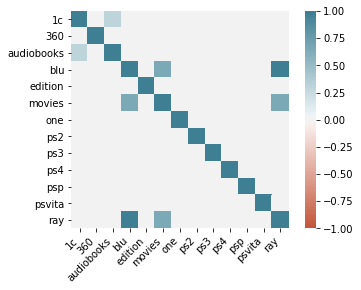

In [56]:
vectorizer = CountVectorizer(min_df=3, max_df=3)

X = vectorizer.fit_transform(dfitemcats.item_category_name_en)

feats = vectorizer.get_feature_names()

corr = pd.DataFrame(X.toarray(), columns=feats).corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

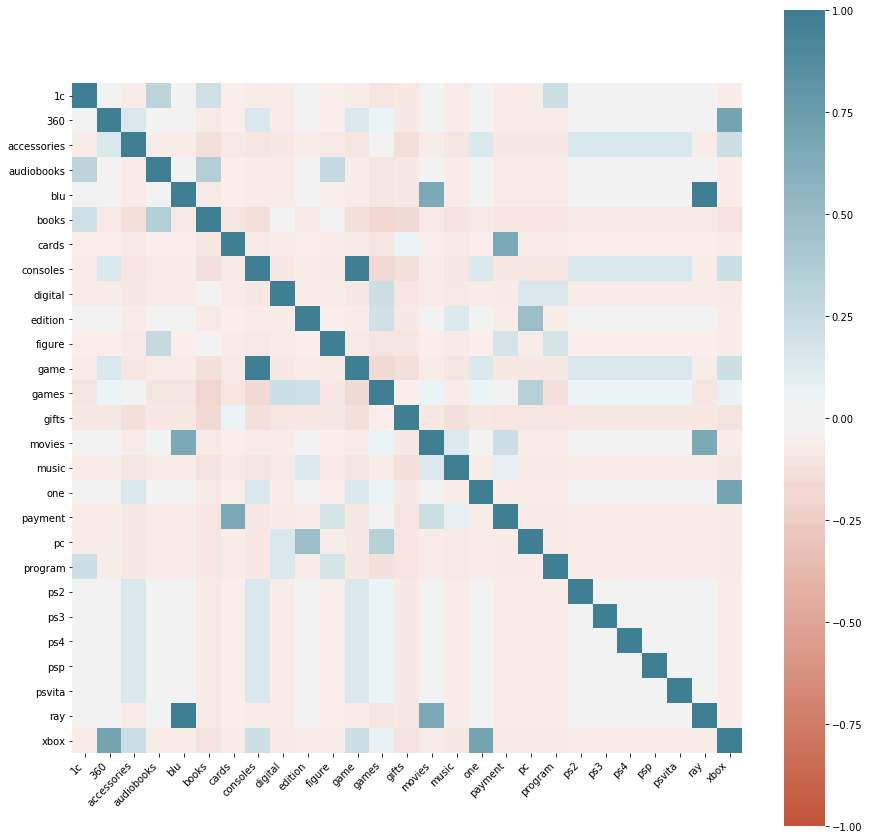

In [63]:
vectorizer = CountVectorizer(min_df=3)

X = vectorizer.fit_transform(dfitemcats.item_category_name_en)

feats = vectorizer.get_feature_names()

corr = pd.DataFrame(X.toarray(), columns=feats).corr()
plt.figure(figsize=(15, 15))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

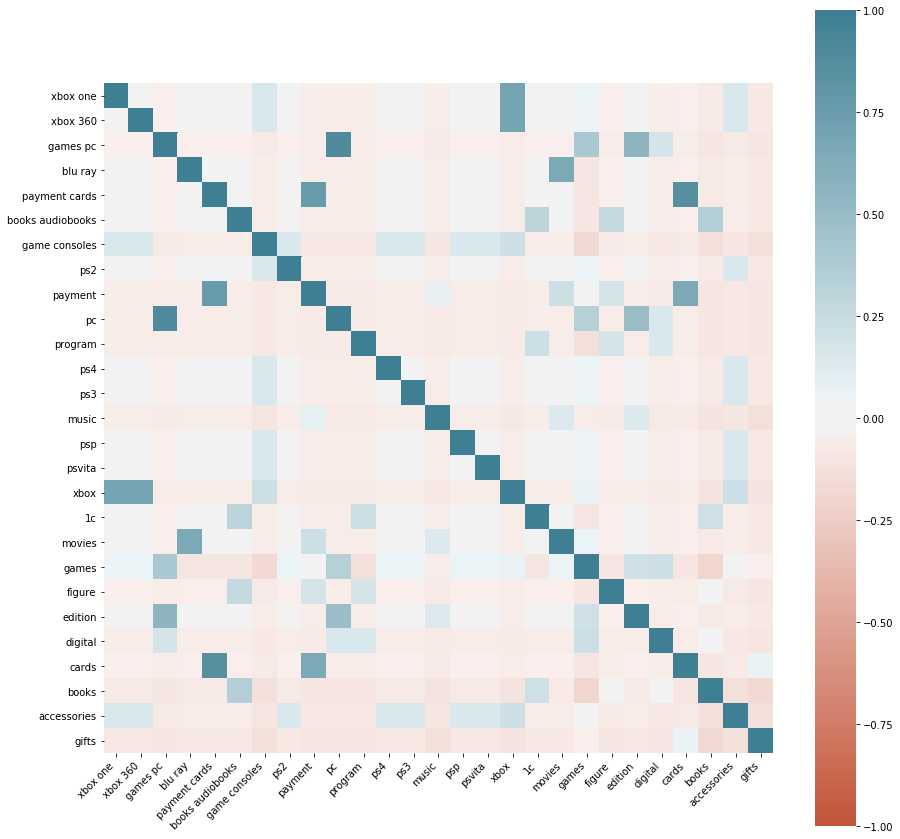

In [132]:
vectorizer = CountVectorizer(min_df=3, ngram_range=(1,2))

X = vectorizer.fit_transform(dfitemcats.item_category_name_en)

feats = vectorizer.get_feature_names()

df = pd.DataFrame(X.toarray(), columns=feats).T
df['ngram'] = [len(i.split()) for i in df.index]
df = df.sort_values(by='ngram', ascending=False)
df = df.drop(columns='ngram').drop_duplicates().T

corr = df.corr()
plt.figure(figsize=(15, 15))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

### TFiDF

In [66]:
from sklearn.feature_extraction.text import TfidfVectorizer

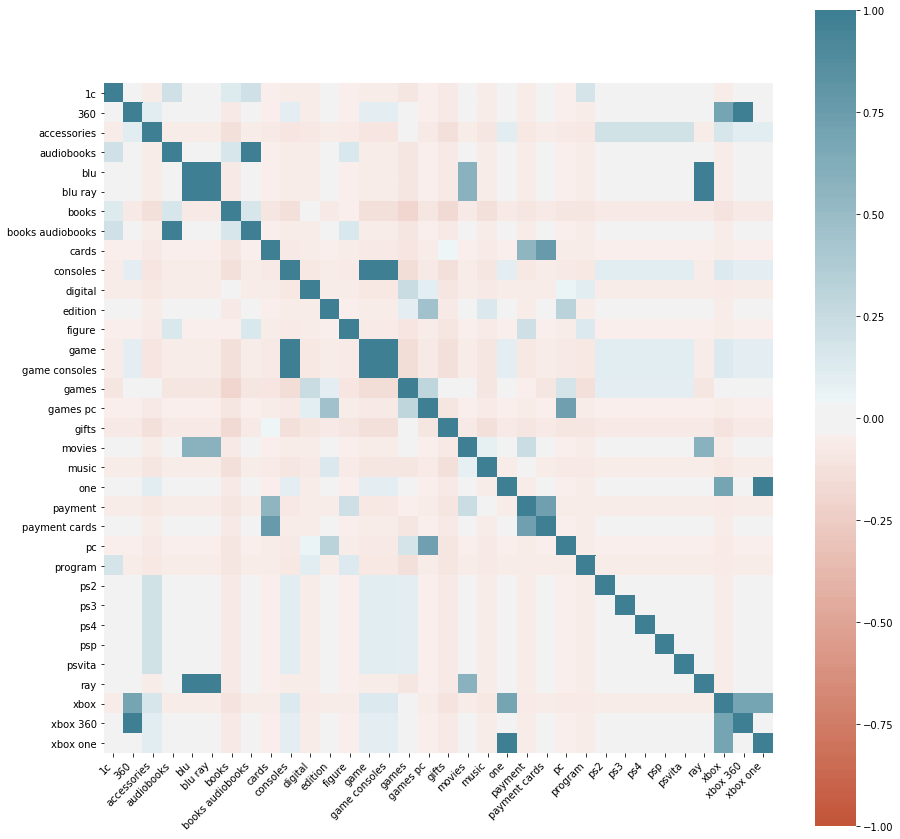

In [68]:
vectorizer = TfidfVectorizer(ngram_range=(1, 2), min_df=3)

X = vectorizer.fit_transform(dfitemcats.item_category_name_en)

feats = vectorizer.get_feature_names()

corr = pd.DataFrame(X.toarray(), columns=feats).corr()
plt.figure(figsize=(15, 15))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [72]:
df = pd.DataFrame(X.toarray(), columns=feats)

corr = pd.melt(corr.reset_index(), id_vars='index')

corr['same'] = [1 if str(i) == str(j) else 0 for i, j in zip(corr['index'], corr.variable)]

check = corr[(corr.value > 0.7) & (corr['index'] != corr.variable)]